In [ ]:
import pandas as pd
import numpy as np
import re
import string
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('ggplot')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
tweet = pd.read_csv('train.csv')

In [ ]:
tweet.head()

In [ ]:
### shape of data
tweet.shape

In [ ]:
tweet.info()

## Exploratory data analysis

In [ ]:
plt.rcParams['figure.figsize']= [11,6]
# dpi - Dots per inch
plt.rcParams['figure.dpi'] = 120

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Real or fake disaster tweet')

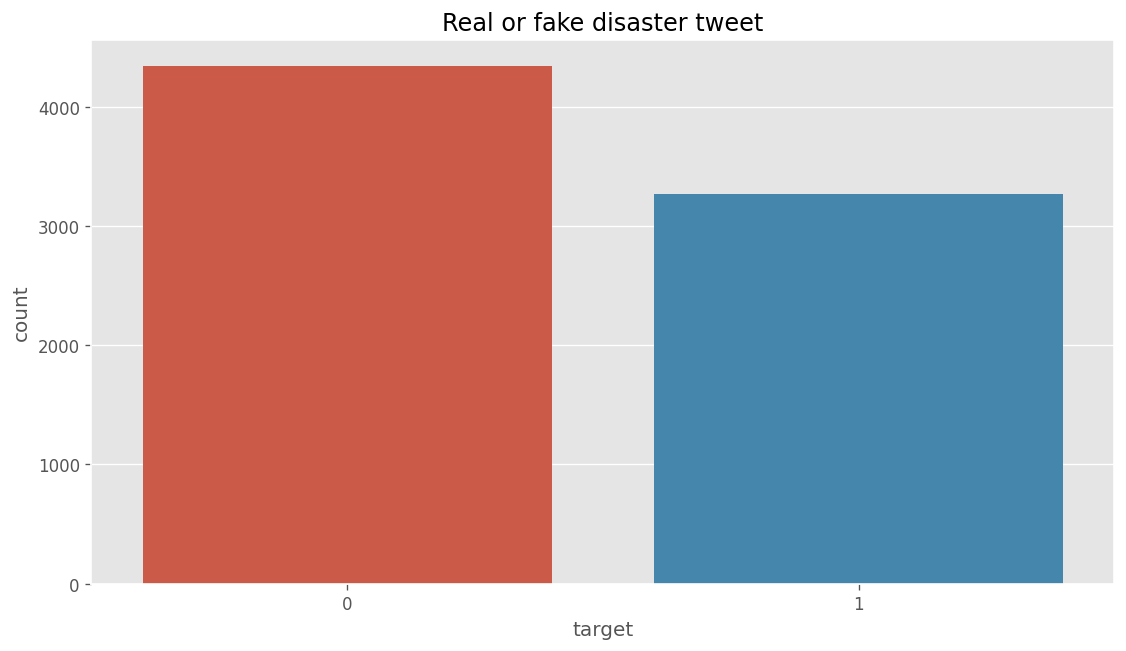

In [ ]:
## class distribution  dpi - Dots per inch
sns.countplot('target', data = tweet)
plt.title('Real or fake disaster tweet')



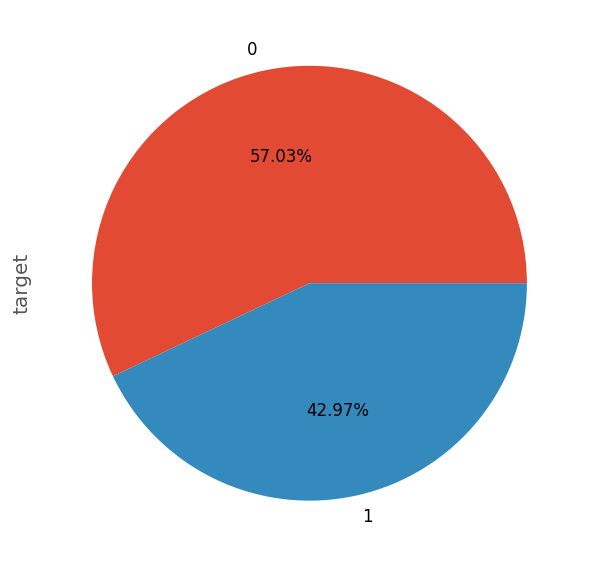

In [ ]:
tweet['target'].value_counts().plot.pie(autopct='%1.2f%%')

In [ ]:
## no. of character distribution in tweet
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-yxc1ih65
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-yxc1ih65
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=e13650e96ba5b9e2f3b924b28cfda4b6a6a850e469d0ec2d00082e580d140337
  Stored in directory: /tmp/pip-ephem-wheel-cache-tvlb19rn/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as kgp

In [ ]:
## preproces - calcualte total number of character,words,avg word characters per word,emails,mob. no.

In [ ]:
tweet = kgp.get_basic_features(tweet)

In [ ]:
tweet.head()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


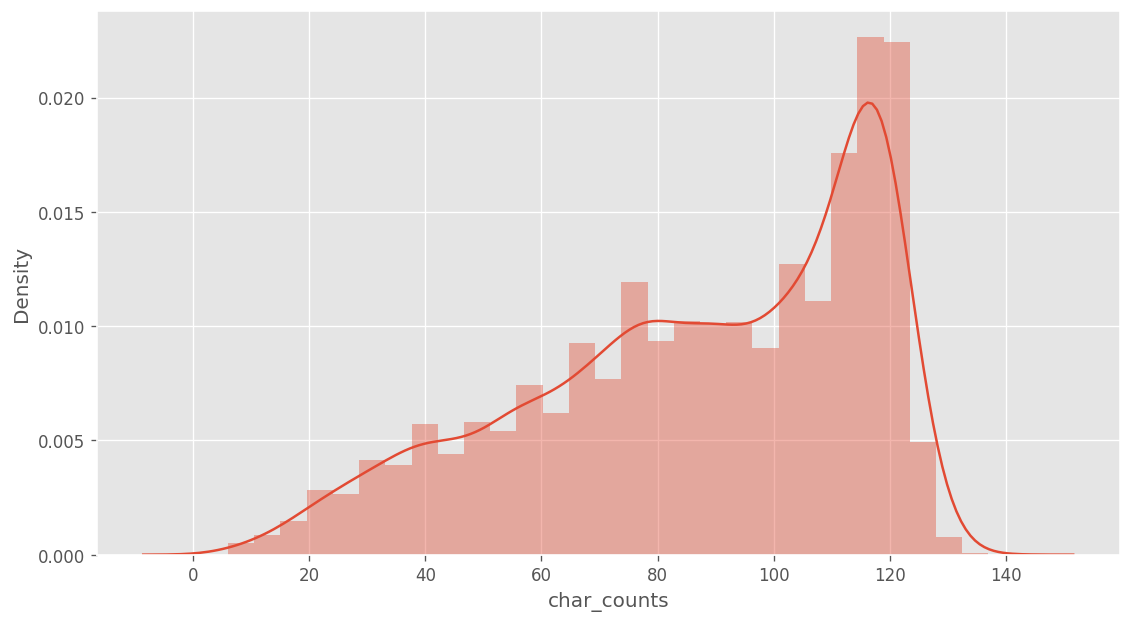

In [ ]:
sns.distplot(tweet['char_counts'])

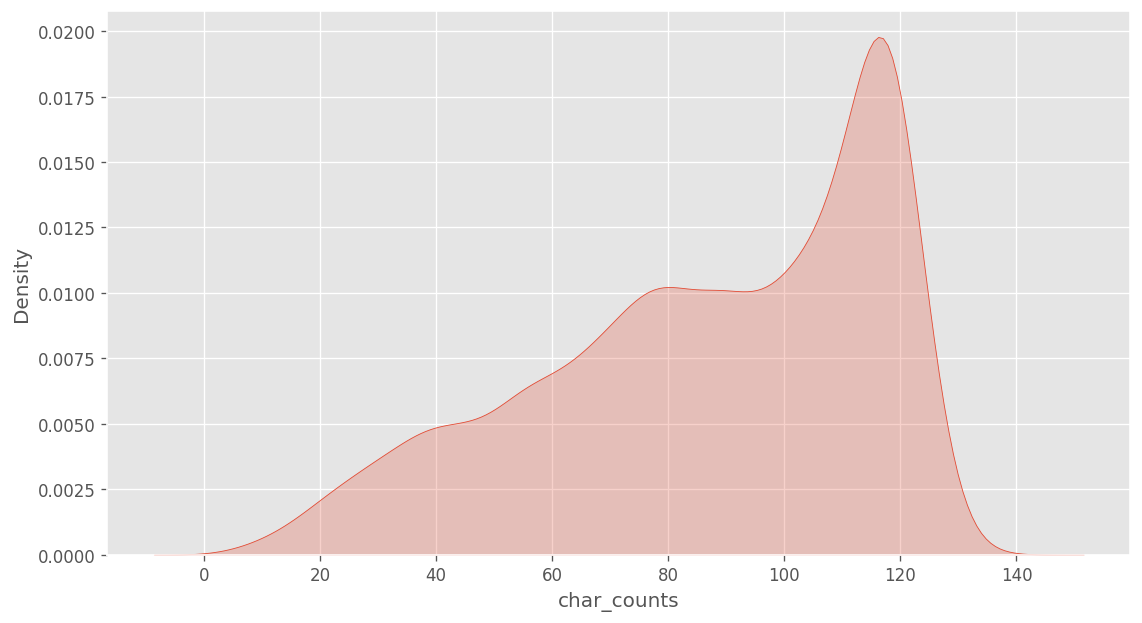

In [ ]:
sns.kdeplot(tweet['char_counts'], shade = True)

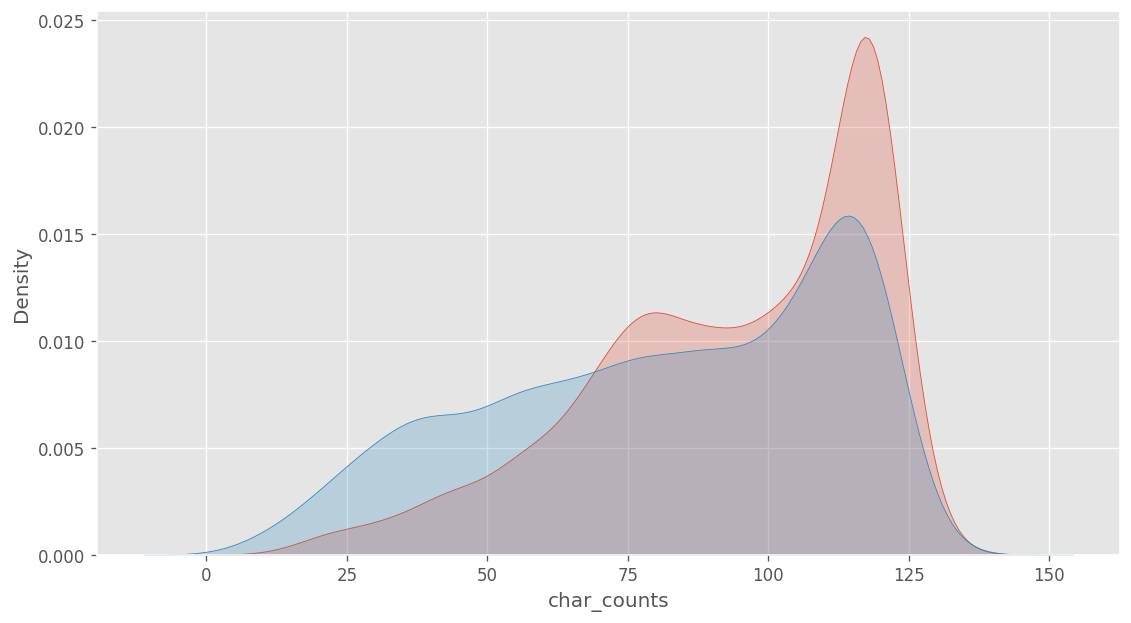

In [ ]:
sns.kdeplot(tweet[tweet['target'] == 1]['char_counts'], shade = True)
sns.kdeplot(tweet[tweet['target'] == 0]['char_counts'], shade = True)

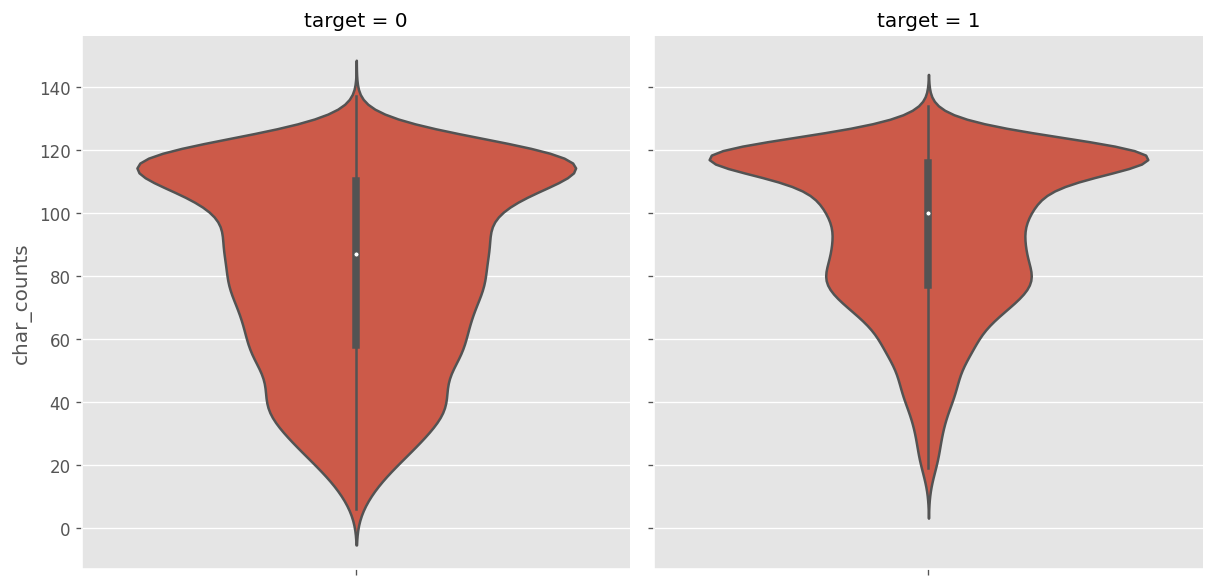

In [ ]:
sns.catplot(y = 'char_counts',data=tweet,kind = 'violin', col = 'target')

## Number of words,average word length and stopword distribution intweets


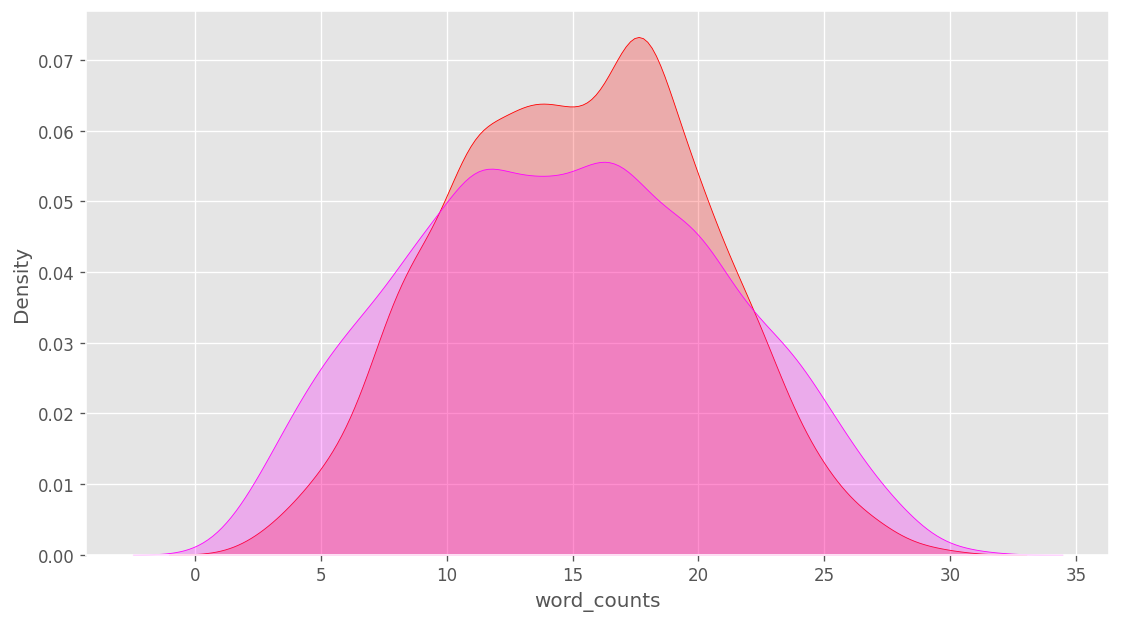

In [ ]:
sns.kdeplot(tweet[tweet['target'] == 1]['word_counts'], shade = True, color = 'red')
sns.kdeplot(tweet[tweet['target'] == 0]['word_counts'], shade = True, color = 'magenta')

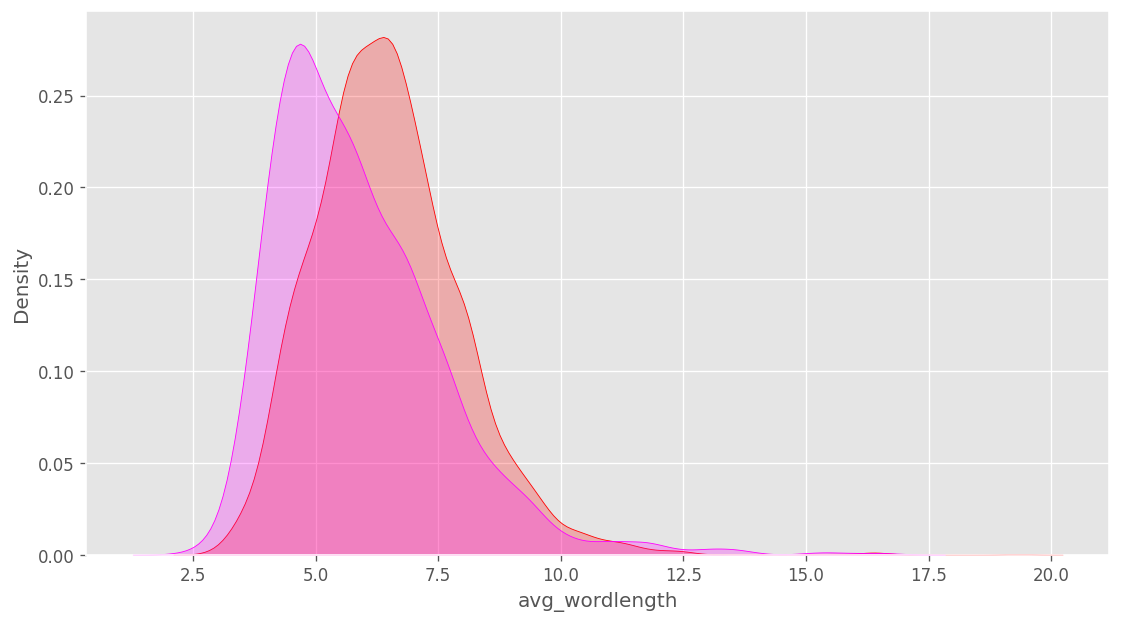

In [ ]:
sns.kdeplot(tweet[tweet['target'] == 1]['avg_wordlength'], shade = True, color = 'red')
sns.kdeplot(tweet[tweet['target'] == 0]['avg_wordlength'], shade = True, color = 'magenta')

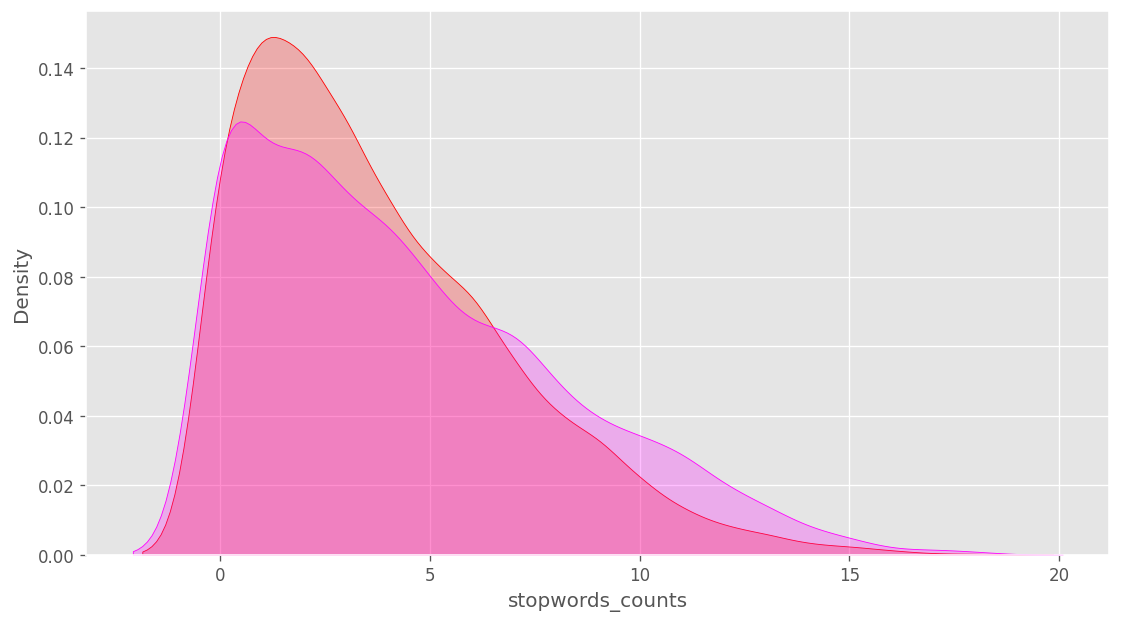

In [ ]:
sns.kdeplot(tweet[tweet['target'] == 1]['stopwords_counts'], shade = True, color = 'red')
sns.kdeplot(tweet[tweet['target'] == 0]['stopwords_counts'], shade = True, color = 'magenta')

## Most and least common words


In [ ]:
freqs = kgp.get_word_freqs(tweet,'text')

In [ ]:
top20 = freqs[:20]

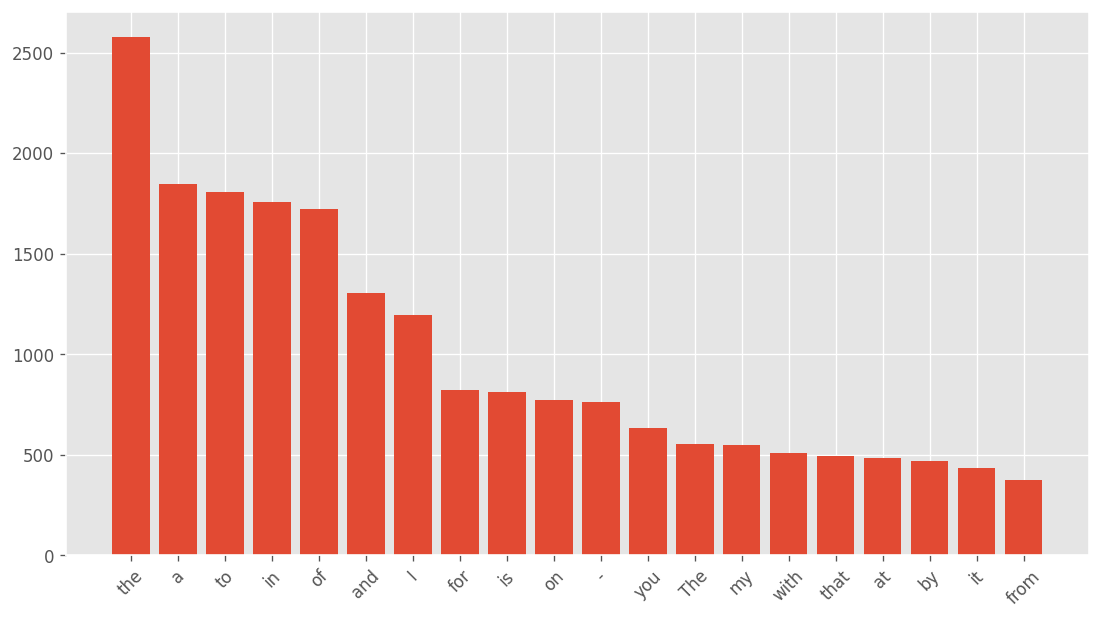

In [ ]:
plt.bar(top20.index,top20.values)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
least20 = freqs[-20:]
least20

fact-checking             1
@wyattb23                 1
Window                    1
call...                   1
#Boston                   1
http://t.co/Vcjcykq8b8    1
http://t.co/TagZbcXFj0    1
(-9)                      1
http://t.co/6suPThAece    1
http://t.co/FP64YOSJwx    1
http://t.co/cvhYGwcBZv    1
http://t.co/y3dM9uLqxG    1
http://t.co/Jpu9gIps9f    1
@JulieChen                1
http://t.co/5uFTRXPpV0    1
DTB                       1
plenty                    1
song:                     1
Burundi's                 1
http://t.co/FTM4RKl8mN    1
dtype: int64

In [ ]:
## bigram - two word at a time
bigram = kgp.get_ngram(tweet,'text',ngram_range=2)

In [ ]:
bigram[:20]

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476)]

In [ ]:
bigram[-20:]

[('00end date', 19),
 ('0000 utc', 18),
 ('000 riot', 17),
 ('000 people', 16),
 ('000 gems', 15),
 ('00 white', 14),
 ('00 tonight', 13),
 ('00 to', 12),
 ('00 thursday', 11),
 ('00 thread', 10),
 ('00 pm', 9),
 ('00 in', 8),
 ('00 http', 7),
 ('00 hiroshima', 6),
 ('00 bestseller', 5),
 ('00 at', 4),
 ('00 am', 3),
 ('00 52', 2),
 ('00 25', 1),
 ('00 11', 0)]

## one shot data cleaning

In [ ]:
def get_clean(x):
  x = str(x).lower().replace('\\',' ').replace('_',' ').replace('.',' ')   ## remove backward slash (\),_,. with space
  x = kgp.cont_exp(x)    ## expanding abbrevation i'm = i am 
  x = kgp.remove_emails(x)  ## reomve email
  x = kgp.remove_urls(x)    ## remove url
  x = kgp.remove_html_tags(x)    ## remove html
  x = kgp.remove_rt(x)       
  x = kgp.remove_accented_chars(x)
  x = kgp.remove_special_chars(x)
  x = kgp.remove_dups_char(x)
  return x


In [ ]:
tweet['text']  = tweet['text'].apply(lambda x: get_clean(x))

In [ ]:
tweet['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [ ]:
 kgp.get_ngram(tweet,'text',ngram_range=2)

[('zxathetis are', 67861),
 ('zurich for', 67860),
 ('zumiez is', 67859),
 ('zss vs', 67858),
 ('zourryart forgot', 67857),
 ('zouma just', 67856),
 ('zouma has', 67855),
 ('zotar50 skeleton', 67854),
 ('zoom in', 67853),
 ('zonewolf123 liked', 67852),
 ('zonesthank god', 67851),
 ('zones donuat', 67850),
 ('zone with', 67849),
 ('zone what', 67848),
 ('zone war', 67847),
 ('zone they', 67846),
 ('zone protectdenaliwolves', 67845),
 ('zone outside', 67844),
 ('zone of', 67843),
 ('zone my', 67842),
 ('zone littlewomenla', 67841),
 ('zone laugh', 67840),
 ('zone johnny', 67839),
 ('zone in', 67838),
 ('zone httpt', 67837),
 ('zone during', 67836),
 ('zone common', 67835),
 ('zone coming', 67834),
 ('zone but', 67833),
 ('zone and', 67832),
 ('zone amirite', 67831),
 ('zombies take', 67830),
 ('zombie fun', 67829),
 ('zombie feel', 67828),
 ('zombie apocalypse', 67827),
 ('zomatoaus lovefood', 67826),
 ('zojadelin you', 67825),
 ('zodiac girl', 67824),
 ('ziuw httpt', 67823),
 ('zippolin

## disaster word visualization with wordcloud

In [ ]:
real = kgp.get_word_freqs(tweet[tweet['target']==1], 'text')
real = ' '.join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire was are as have my news httpst over up more via disaster an were be people california suicide no has police who when but been killed like do 2 will just hiroshima so than out fires storm crash families we train now about into s emergency your bomb buildings there all mh370 two what am attack they nuclear wildfire video accident get new one bombing how burning minister northern prime dead legionnaires me bomber some homes if car war atomic still obama fatal he years off forest us collapse may debris retweet watch city malaysia first today japan 1 man latest mass or near severe water had before earthquake those confirmed found oil would floods spill down world army 70 warning home under could derailment injured wreckage outbreak 4 evacuation weather 3 thunderstorm saudi migrants being 40 old our say investigators during flooding can missing flood time bridge their back death suspect state her mosque cha

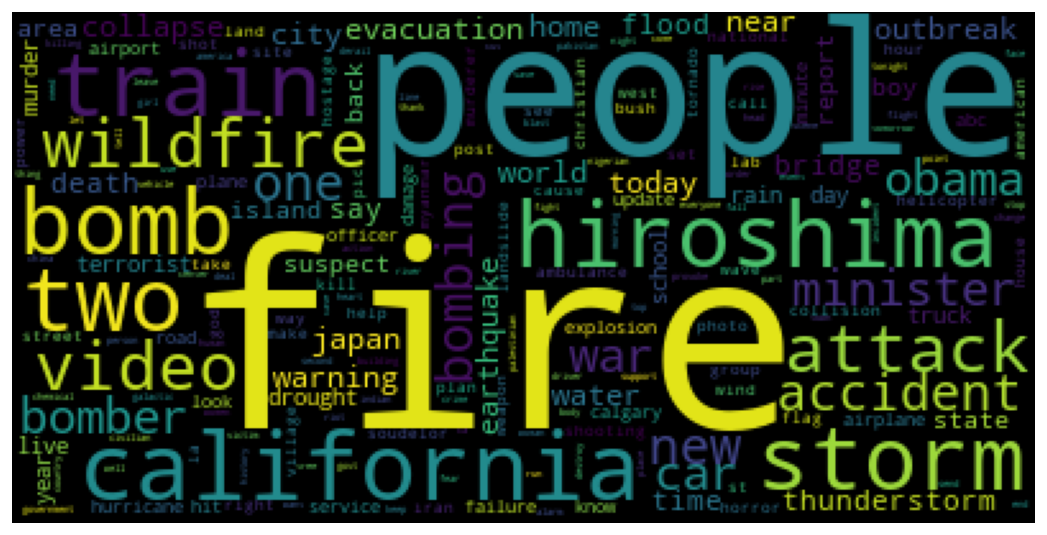

In [ ]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
fake = kgp.get_word_freqs(tweet[tweet['target']==0], 'text')
fake = ' '.join(fake.index)
fake

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has or we no when now about what would an how one can there body people 2 via been her video his into more loud us love know back time why got off them full emergency see after who day 3 cannot going youtube did still fire some good let go she had think laughing want man should ass our world over retweet then way life youre their first work last too burning really make need only than news because god here being much even best many take content could help 5 right him wreck say were feel great black its today hot please fucking 4 never im look every 1 down fear cross before read bags ever does top fuck oh night bag come without these reddit everyone another getting year any panic liked bloody screaming ruin may shit head death bad smoke always u wrecked explode well school face coming crash harm disaster most buildings w

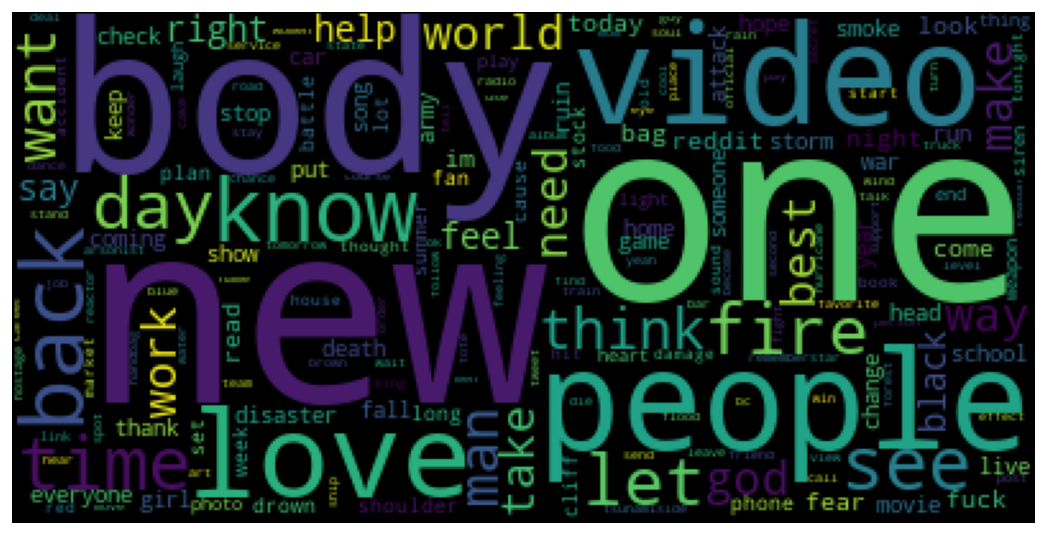

In [ ]:
word_cloud = WordCloud(max_font_size=100).generate(fake)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## classiicatyion withtfidf and svm

In [ ]:
text = tweet['text']
y = tweet['target']

In [ ]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(text)  ## tokenization

In [ ]:
x  
## spare matrix- most of the values are 0.

<7613x22545 sparse matrix of type '<class 'numpy.float64'>'
	with 107268 stored elements in Compressed Sparse Row format>

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state= 0 ,stratify = y)

In [ ]:
def run_svm(clf,x_train,y_train,x_test,y_test ):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [ ]:
run_svm(clf,x_train,y_train,x_test,y_test )


classification_report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [ ]:
## 

## classification with word2vec using svm

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180943 sha256=61f3e09bd08efa841893980ed605d7dac0093993cfd8619971edaead92e36ddd
  Stored in directory: /tmp/pip-ephem-wheel-cache-j4a473yf/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import en_core_web_lg

## create NLP object

In [ ]:
nlp = en_core_web_lg.load()

## create vector

In [ ]:
x = 'cat dog'
doc = nlp(x)

In [ ]:
doc.vector.shape

(300,)

## create function to get vector

In [ ]:
def get_vector(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [ ]:
tweet['vec']  = tweet['text'].apply(lambda x: get_vector(x))

In [ ]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.26623327, 0.05843069, -0.1404636, -0.05265..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.014817425, -0.09212343, -0.10716944, -0.33..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[0.0059339865, 0.016337818, -0.105279535, -0.0..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-0.13400537, 0.25267026, 0.09032763, -0.16645..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.06394094, -0.01423019, 0.0063574947, 0.071..."


## convert vector in numpy arrary

In [ ]:
x = tweet['vec'].to_numpy()
x = x.reshape(-1,1)  ## adjust in one column with as row as required


In [ ]:
x

array([[array([-2.66233265e-01,  5.84306903e-02, -1.40463606e-01, -5.26588522e-02,
       -2.14530993e-03, -1.21439859e-01, -2.79072933e-02,  1.68873310e-01,
        2.79461779e-02,  2.27955627e+00, -1.11519486e-01, -3.06724869e-02,
        1.03592232e-01, -1.05660327e-01, -2.28190199e-01,  2.79889666e-02,
       -1.46331608e-01,  9.07751679e-01, -1.61362469e-01,  1.31339535e-01,
        4.89561353e-03, -1.84435159e-01,  4.26144543e-05,  8.49806145e-02,
        3.38713825e-02,  9.68834534e-02, -9.71195325e-02,  2.48919148e-03,
       -1.33919463e-01,  1.52661011e-01, -7.98190664e-03,  2.75931388e-01,
       -1.76876560e-01,  1.51992857e-01,  1.10118151e-01,  4.32643034e-02,
       -1.16125271e-01, -5.33458777e-03, -7.49662519e-02,  1.15647845e-01,
       -1.89541608e-01, -1.56142283e-02,  3.45693864e-02, -3.92473862e-02,
       -2.95386836e-02, -1.08877771e-01,  1.81476958e-02,  1.93963528e-01,
        5.79046980e-02,  5.32473065e-02, -1.20647073e-01, -2.54738703e-02,
       -1.0901068

In [ ]:
x.shape

(7613, 1)

In [ ]:
## 300 shape
x = np.concatenate(np.concatenate(x,axis=0), axis = 0).reshape(-1,300)

In [ ]:
x.shape

(7613, 300)

In [ ]:
y = tweet['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state= 0 ,stratify = y)

In [ ]:
def run_svm(clf,x_train,y_train,x_test,y_test ):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [ ]:
run_svm(clf,x_train,y_train,x_test,y_test )


classification_report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.81      0.71      0.76       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



## Note - using tfidf , accuracy - 0.81 , using wordtovec accuracy = 0.80 .bcoz wordvec works only with spacy which is trained on only std. english not on tweeter english.o/p vector is zero of wrong mispelled tweeter english

## word embedding and classification with deep learning

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer  ## using CNN, toeknizer
from tensorflow.keras.preprocessing.sequence import pad_sequences   ## to make fixed length of text data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import  Conv1D,MaxPooling1D,GlobalMaxPooling1D



In [ ]:
## deep learning tokenization

In [ ]:
token = Tokenizer()
token.fit_on_texts(text)

In [ ]:
vocab_size  =  len(token.word_index)+1  #add 1 as per tenorflo docs
vocab_size

22581

In [ ]:
print(token.word_index)

{'httpt': 1, 'the': 2, 'a': 3, 'in': 4, 'to': 5, 'of': 6, 'i': 7, 'and': 8, 'is': 9, 'you': 10, 'for': 11, 'on': 12, 'it': 13, 'my': 14, 'not': 15, 'that': 16, 'with': 17, 'at': 18, 'by': 19, 'this': 20, 'have': 21, 'are': 22, 'from': 23, 'be': 24, 'was': 25, 'httpst': 26, 'do': 27, 'like': 28, 'as': 29, 'out': 30, 'am': 31, 'so': 32, 'your': 33, 'up': 34, 'me': 35, 'just': 36, 'but': 37, 'will': 38, 'after': 39, 'has': 40, 'all': 41, 'no': 42, 'fire': 43, 'an': 44, 'when': 45, 'if': 46, 'he': 47, 'new': 48, 'we': 49, 'get': 50, 'they': 51, 'now': 52, 'about': 53, 'via': 54, 'more': 55, 'people': 56, 'what': 57, 'or': 58, 'how': 59, 'one': 60, 'been': 61, 'there': 62, '2': 63, 'over': 64, 'news': 65, 'would': 66, 'who': 67, 'into': 68, 'were': 69, 'video': 70, 'can': 71, 'emergency': 72, 'disaster': 73, 'us': 74, 'police': 75, 'than': 76, 'off': 77, 'her': 78, 'some': 79, 'still': 80, 'his': 81, 'body': 82, 'back': 83, 'time': 84, 'burning': 85, 'california': 86, 'crash': 87, 'know': 8

In [ ]:
## get encoded text
encoded_text = token.texts_to_sequences(text)

In [ ]:
print(encoded_text)  #length of token not fixed, set total word count - 35 based on word length distribution

[[109, 4491, 22, 2, 868, 6, 20, 246, 129, 1681, 4492, 74, 41], [186, 43, 223, 763, 6792, 6793, 1328], [41, 1682, 1435, 5, 2062, 4, 655, 22, 125, 6794, 19, 1683, 42, 438, 253, 58, 2062, 4, 655, 1329, 22, 1054], [2809, 56, 4493, 1330, 253, 1329, 4, 86], [36, 93, 1159, 20, 314, 23, 6795, 2063, 29, 261, 23, 1330, 6796, 68, 3, 189], [2810, 391, 86, 1554, 793, 829, 4, 637, 6797, 534, 5, 1106, 372, 43, 4494, 1330], [224, 73, 830, 282, 1160, 831, 247, 6, 1862, 4, 6798, 999, 2344, 1555], [7, 31, 12, 225, 6, 2, 1863, 8, 7, 71, 103, 3, 43, 4, 2, 4495], [62, 9, 44, 72, 253, 1237, 52, 4, 2, 585, 832, 2, 703], [7, 31, 2345, 16, 2, 489, 9, 240, 5, 109, 354], [586, 56, 611, 23, 2, 283, 467, 32, 612], [833, 613, 2811, 9, 217, 2812, 3467, 656, 3, 657, 7, 199, 4, 613, 2811, 57, 31, 7, 301, 27, 57, 31, 7, 301, 27, 6799, 247], [2813, 247, 2064, 6800, 2811, 1436, 58, 1864, 614, 7, 21, 735, 3468], [224, 4, 4496, 912, 49, 1684, 4496], [241, 5, 189, 392, 12, 2346, 4, 4497, 126, 87, 355], [638, 34, 96], [7, 110

In [ ]:
max_length = 40
x = pad_sequences(encoded_text, maxlen=max_length,padding='post')    ## all tweet length would be 40, add o after word length tilll 40 count


In [ ]:
print(x)

[[ 109 4491   22 ...    0    0    0]
 [ 186   43  223 ...    0    0    0]
 [  41 1682 1435 ...    0    0    0]
 ...
 [2709 2295 4483 ...    0    0    0]
 [  75 1092   39 ...    0    0    0]
 [   2  206   55 ...    0    0    0]]


In [ ]:
x.shape

(7613, 40)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state= 0 ,stratify = y)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [ ]:
run_svm(clf,x_train,y_train,x_test,y_test )


classification_report
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       869
           1       0.44      0.56      0.49       654

    accuracy                           0.51      1523
   macro avg       0.51      0.51      0.51      1523
weighted avg       0.52      0.51      0.51      1523



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## implement deep learning

In [ ]:
## building cnn model
vec_size = 300

model = Sequential()   # seuential layer
model.add(Embedding(vocab_size,vec_size,input_length=max_length))  ## embedding layer create vector in depp learning

model.add(Conv1D(32,2,activation='relu'))
model.add(MaxPooling1D(2))  
model.add(Dropout(0.5))  # 50% neural network will br drop while training

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))

model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f317b045fd0>>

In [ ]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=  'accuracy')
model.fit(x_train,y_train, epochs = 5 , validation_data=(x_test,y_test))

Epoch 1/5
191/191 [==============================] - 45s 69ms/step - loss: 0.6681 - accuracy: 0.5933 - val_loss: 0.6223 - val_accuracy: 0.7374
Epoch 2/5
191/191 [==============================] - 13s 66ms/step - loss: 0.5196 - accuracy: 0.7606 - val_loss: 0.5055 - val_accuracy: 0.8024
Epoch 3/5
191/191 [==============================] - 13s 67ms/step - loss: 0.3556 - accuracy: 0.8608 - val_loss: 0.4847 - val_accuracy: 0.7807
Epoch 4/5
191/191 [==============================] - 13s 68ms/step - loss: 0.2345 - accuracy: 0.9179 - val_loss: 0.4998 - val_accuracy: 0.7682
Epoch 5/5
191/191 [==============================] - 13s 70ms/step - loss: 0.1424 - accuracy: 0.9509 - val_loss: 0.5395 - val_accuracy: 0.7472
CPU times: user 1min 52s, sys: 4.12 s, total: 1min 56s
Wall time: 2min 22s


In [ ]:
## DL need large daataset for training, need hyperparameter tuning to increase accuracy


In [ ]:
## prediction
def get_encoded(x):
  x = get_clean(x)
  x = [x]
  x = token.texts_to_sequences(x)
  x = pad_sequences(x,maxlen=max_length,padding='post')
  return x



In [ ]:
x = ' i m thrilled to see this'
vec = get_encoded(x)

In [ ]:
np.argmax(model.predict(vec), axis = -1)

array([0])

## Berrt Moeel building and training

In [ ]:
!pip install ktrain

In [ ]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


In [ ]:
from ktrain import text
import ktrain

In [ ]:
## 10% trainig data consider as validation dataset,preprocess model bert text data from text column, target from label col, - return 2 tuple, one preproc o/p

In [ ]:
(x_train,y_train),(x_test,y_test),prepoc = text.texts_from_df(train_df = tweet, text_column = 'text', label_columns = 'target', maxlen = 40 , preprocess_mode ='bert')

['not_target', 'target']
      not_target  target
392          0.0     1.0
6021         0.0     1.0
6901         1.0     0.0
7588         0.0     1.0
4078         0.0     1.0
['not_target', 'target']
      not_target  target
4677         1.0     0.0
4637         0.0     1.0
2249         1.0     0.0
7311         1.0     0.0
2688         1.0     0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
## get bert model
model = text.text_classifier(name = 'bert',  train_data=(x_train,y_train), preproc=prepoc)

Is Multi-Label? False
maxlen is 40
done.


In [ ]:
learner = ktrain.get_learner(model=model, train_data=(x_train,y_train), val_data=(x_test,y_test), batch_size=64)

In [ ]:
learner.fit_onecycle(lr= 2e-5,epochs = 1)  ## model is nderfitting since validation accuracy is higher than training accuracy



begin training using onecycle policy with max lr of 2e-05...
108/108 [==============================] - 101s 766ms/step - loss: 0.4969 - accuracy: 0.7653 - val_loss: 0.3917 - val_accuracy: 0.8320


In [ ]:
learner.fit_onecycle(lr= 2e-4,epochs = 3) 



begin training using onecycle policy with max lr of 0.0002...
Epoch 1/3
108/108 [==============================] - 79s 732ms/step - loss: 0.3891 - accuracy: 0.8311 - val_loss: 0.4035 - val_accuracy: 0.8333
Epoch 2/3
108/108 [==============================] - 79s 729ms/step - loss: 0.3267 - accuracy: 0.8682 - val_loss: 0.4256 - val_accuracy: 0.8255
Epoch 3/3
108/108 [==============================] - 79s 728ms/step - loss: 0.1600 - accuracy: 0.9388 - val_loss: 0.5645 - val_accuracy: 0.8412


In [ ]:
 ## optimsl learning rate , epoch no is a challenging task - learner.lr_ find(), learner.lr_plot( tak efew days)

In [ ]:
## prediction
predictor = ktrain.get_predictor(learner.model, preproc = prepoc)

In [ ]:
data = ['i met u today accidentaly', ' i got today bike accident']

In [ ]:
predictor.predict(data, return_proba = True)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:215: UserWarning: List or array of two texts supplied, so task being treated as text classification. If this is a sentence pair classification task, please cast to tuple.
  warnings.warn('List or array of two texts supplied, so task being treated as text classification. ' +\


array([[0.99700207, 0.00299786],
       [0.3806481 , 0.61935186]], dtype=float32)

In [ ]:
predictor.predict(data[0])

'not_target'

In [ ]:
classes = predictor.get_classes()

In [ ]:
y_pred = predictor.predict(data[0])
classes.index(y_pred)

0